In [35]:
import pandas as pd

In [36]:
df=pd.read_csv(r"C:\Users\reddy\hyderabad_rental_market\deployement\data\clean_data.csv")

In [37]:
df.isnull().sum()

No_of_Rooms          0
Unit_Type            0
Property_Category    0
Locality             0
Price_INR            0
Area_sqft            0
Furnishing_Status    0
Has_Pool             0
Has_Gym              0
Has_Parking          0
Has_Lift             0
Close_to_Hospital    0
Power_Backup         0
Kids_Play_Area       0
Price_per_sqft       0
dtype: int64

In [38]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns.tolist()


In [39]:
num_cols.remove('Price_INR')

In [40]:
import matplotlib.pyplot as plt

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

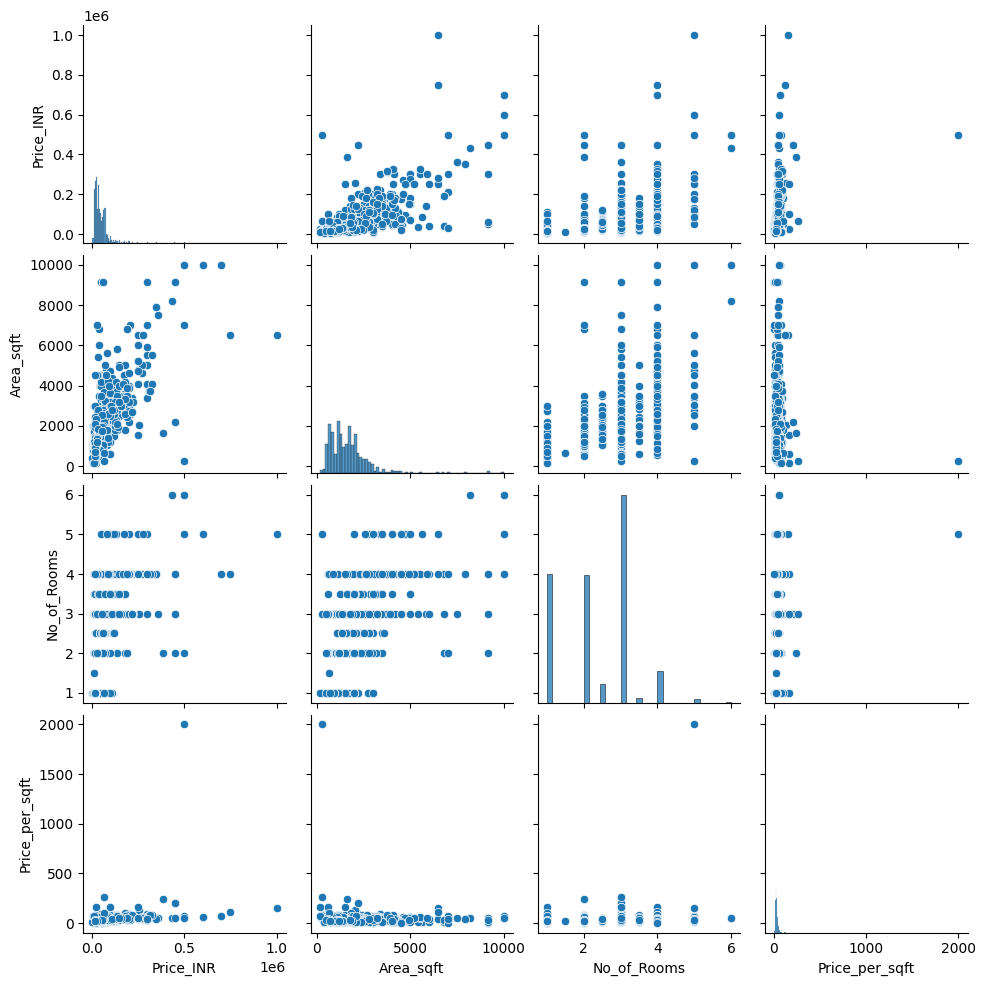

In [42]:
cols = ["Price_INR", "Area_sqft", "No_of_Rooms", "Price_per_sqft"]

sns.pairplot(df[cols])
plt.show()


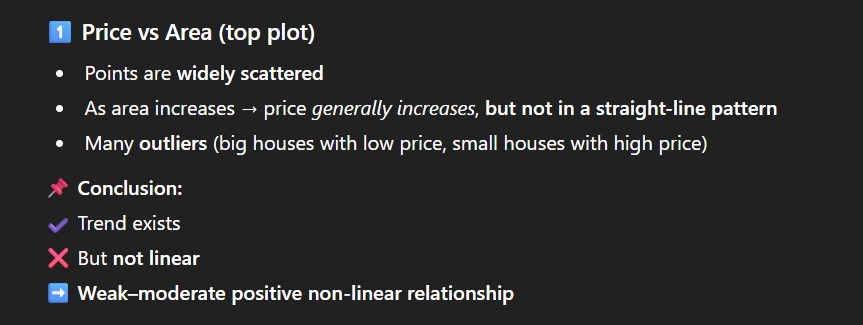

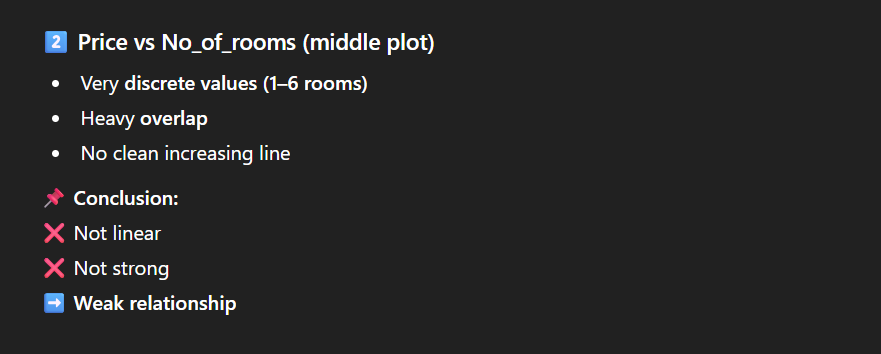

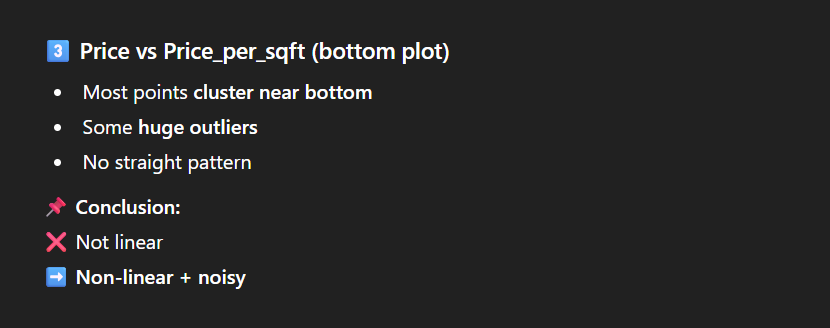

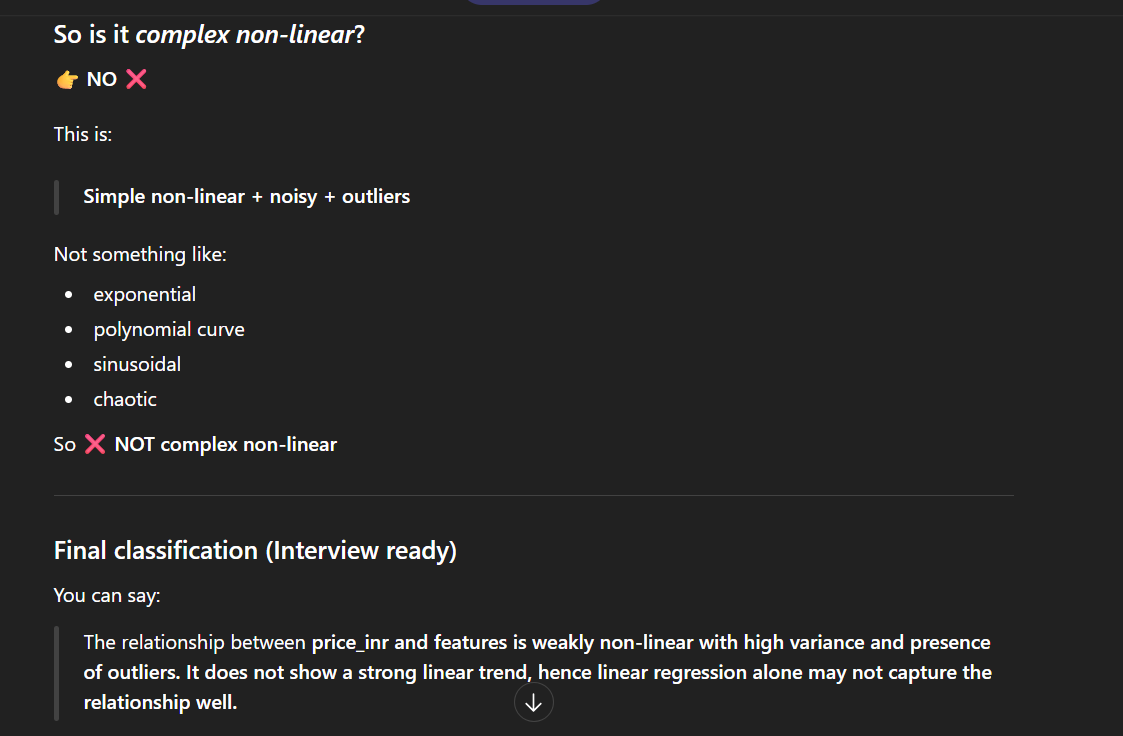

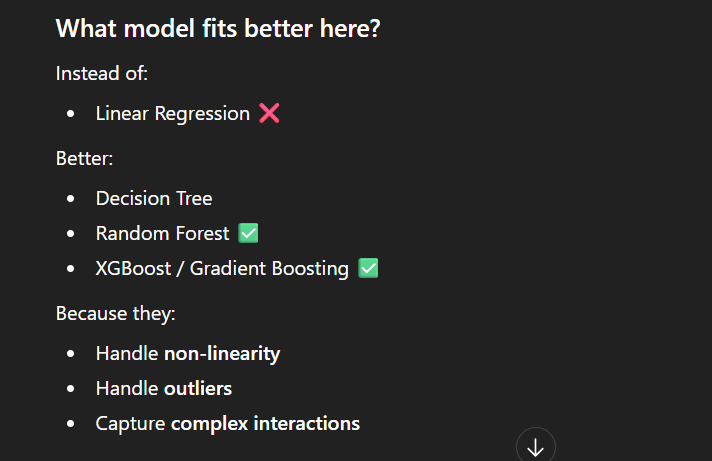

In [43]:
cat_cols

Index(['Unit_Type', 'Property_Category', 'Locality', 'Furnishing_Status',
       'Has_Pool', 'Has_Gym', 'Has_Parking', 'Has_Lift', 'Close_to_Hospital',
       'Power_Backup', 'Kids_Play_Area'],
      dtype='object')

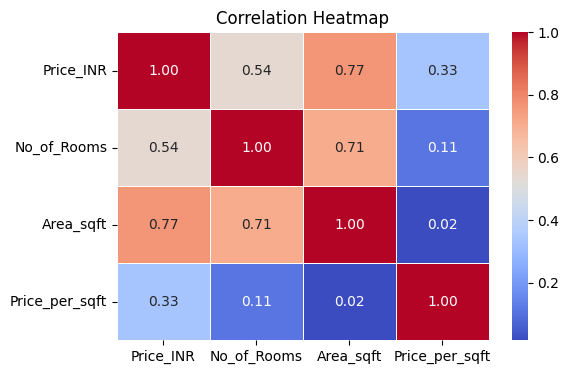

In [44]:
corr = df[['Price_INR','No_of_Rooms','Area_sqft','Price_per_sqft']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [45]:
df[['Price_INR','No_of_Rooms','Area_sqft','Price_per_sqft']].corr()


,Price_INR,No_of_Rooms,Area_sqft,Price_per_sqft
Price_INR,1.000000,0.539351,0.765535,0.332970
No_of_Rooms,0.539351,1.000000,0.706488,0.111912
Area_sqft,0.765535,0.706488,1.000000,0.016021
Price_per_sqft,0.332970,0.111912,0.016021,1.000000


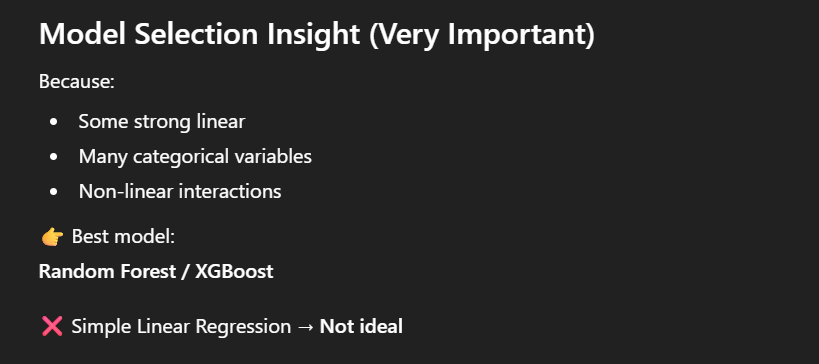

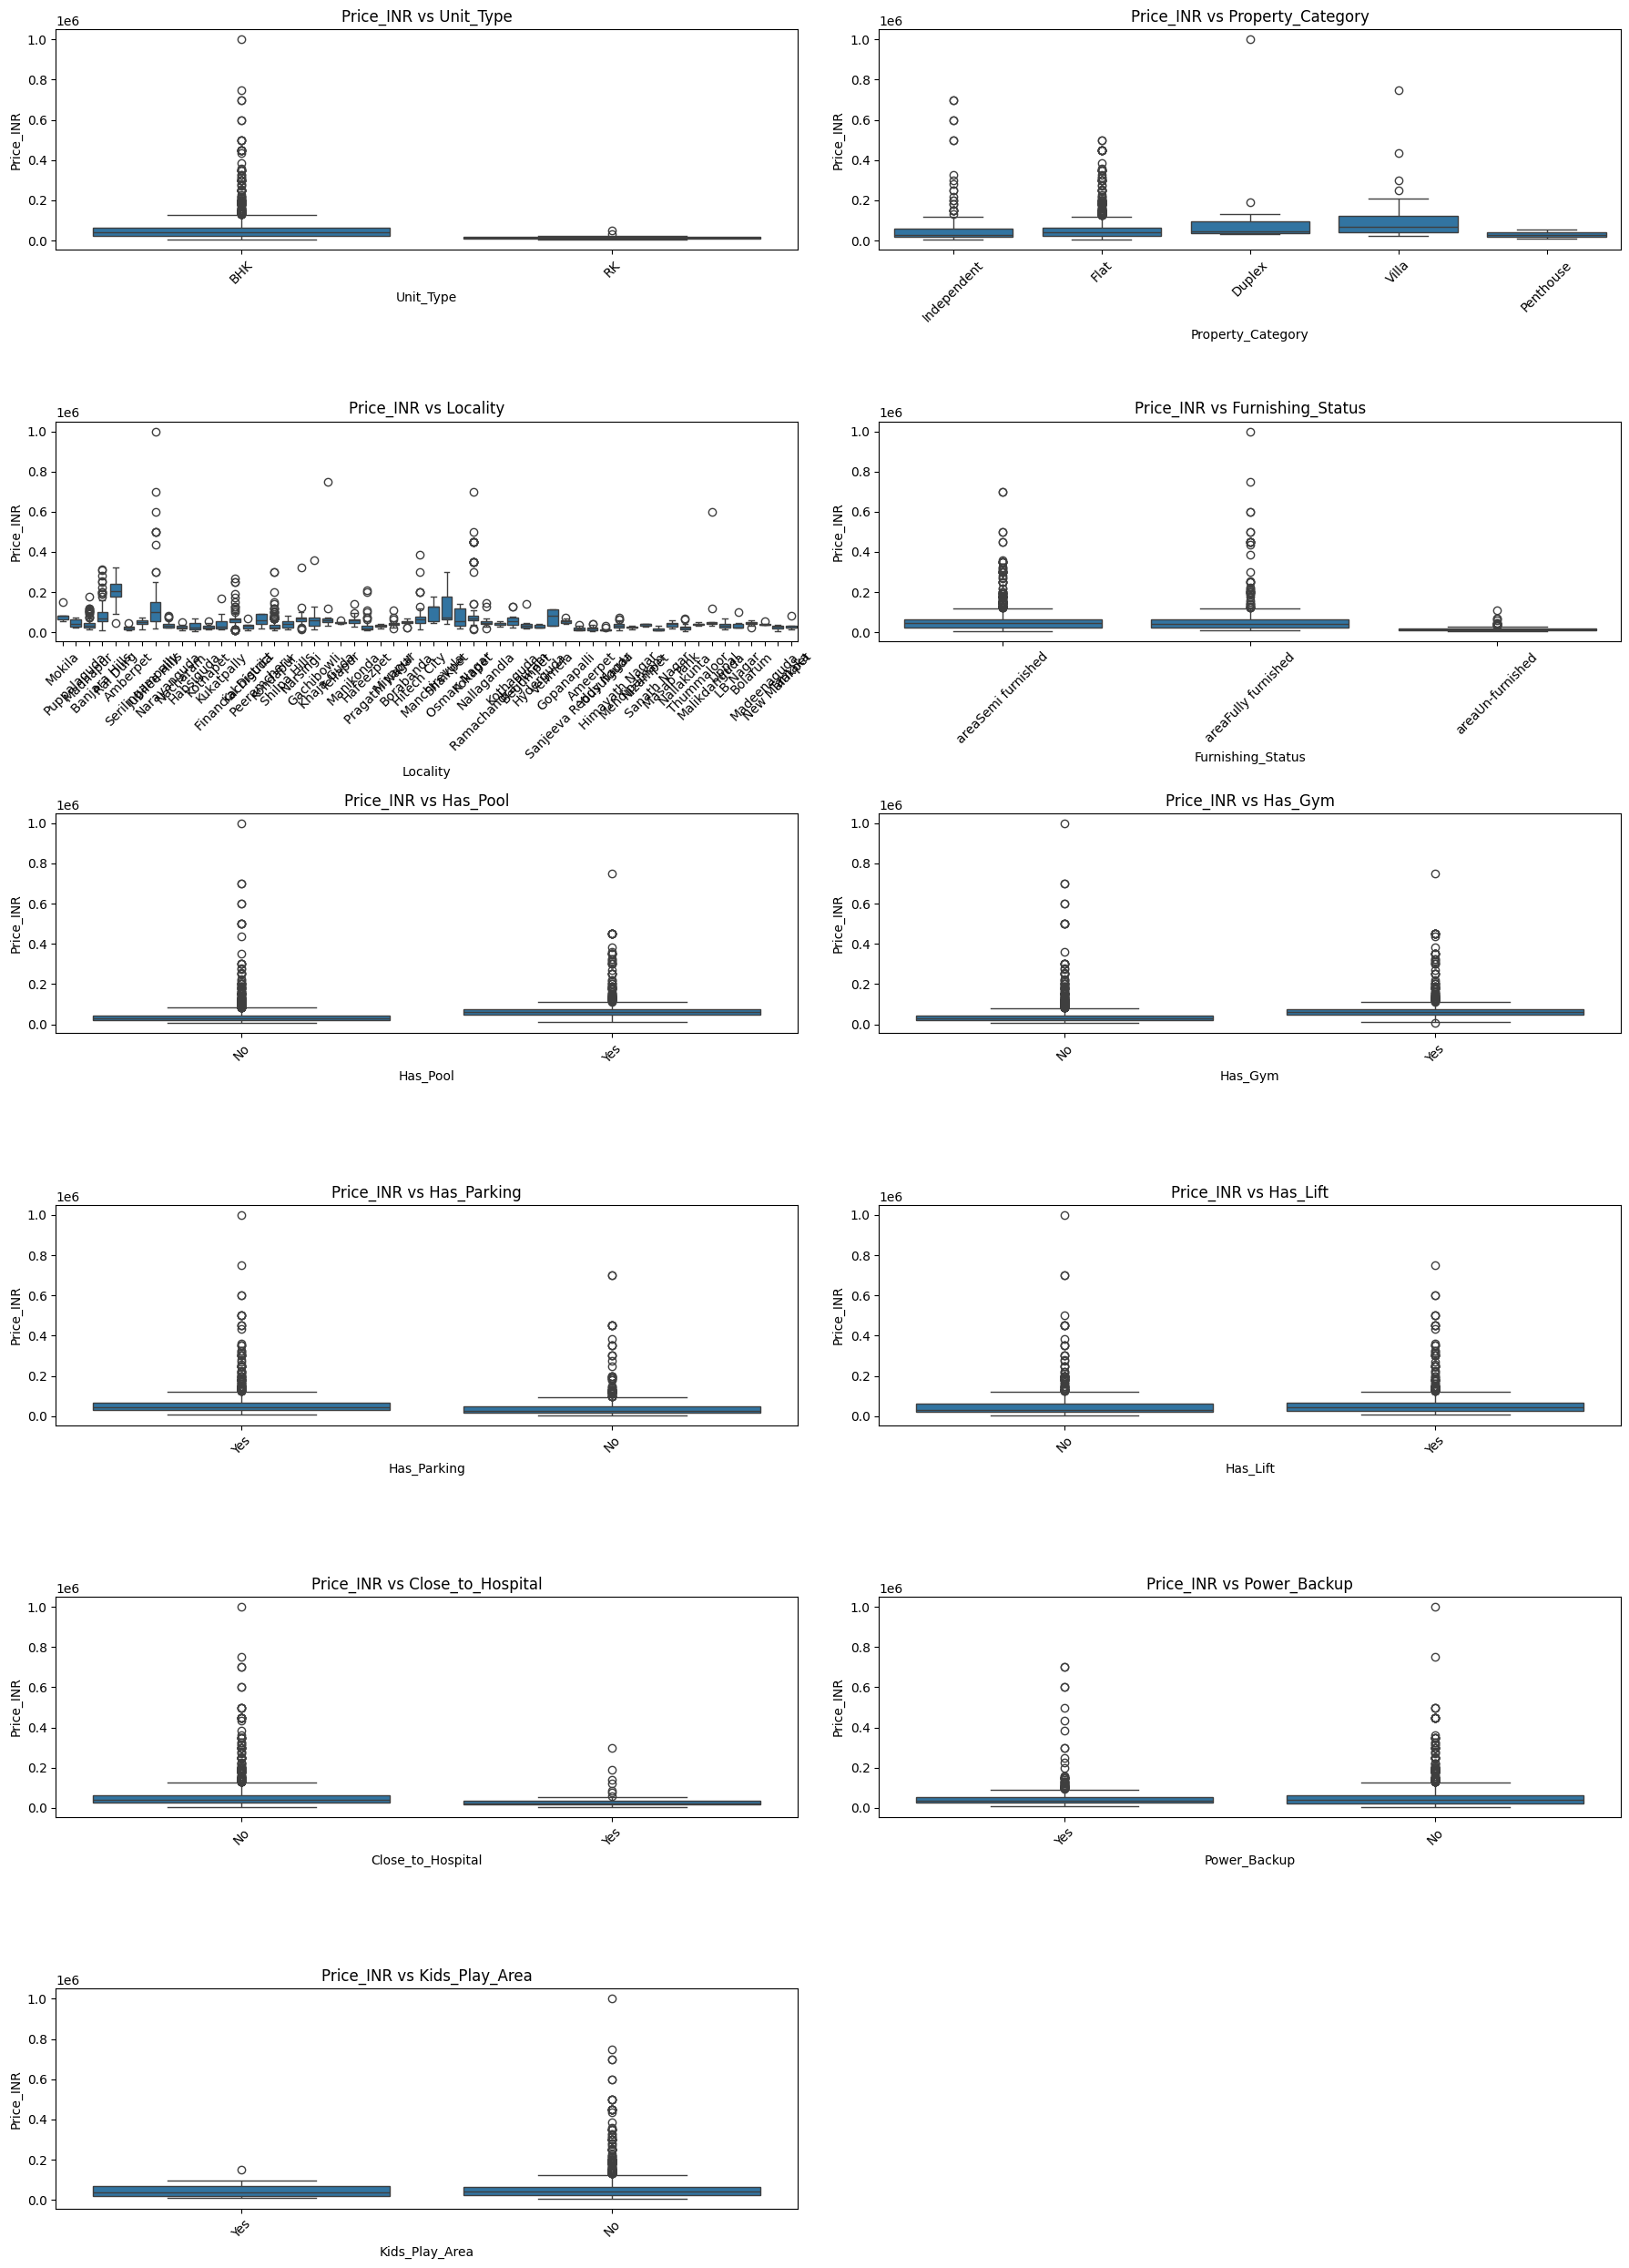

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = [
    'Unit_Type', 'Property_Category', 'Locality', 'Furnishing_Status',
    'Has_Pool', 'Has_Gym', 'Has_Parking', 'Has_Lift',
    'Close_to_Hospital', 'Power_Backup', 'Kids_Play_Area'
]

plt.figure(figsize=(18,25))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x=col, y='Price_INR', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Price_INR vs {col}')

plt.tight_layout()
plt.show()


- ✅ Strong categorical impact / segmentation effect on price

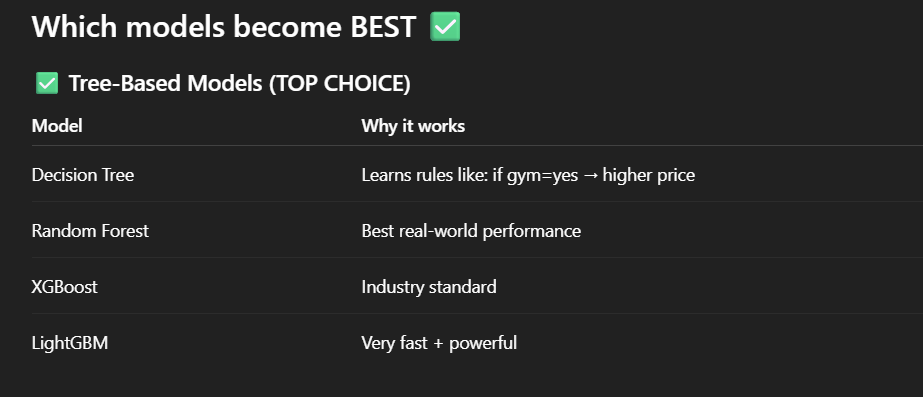

- Big median difference = Step Function

Tree models naturally learn step functions.

Linear models → only straight lines ❌

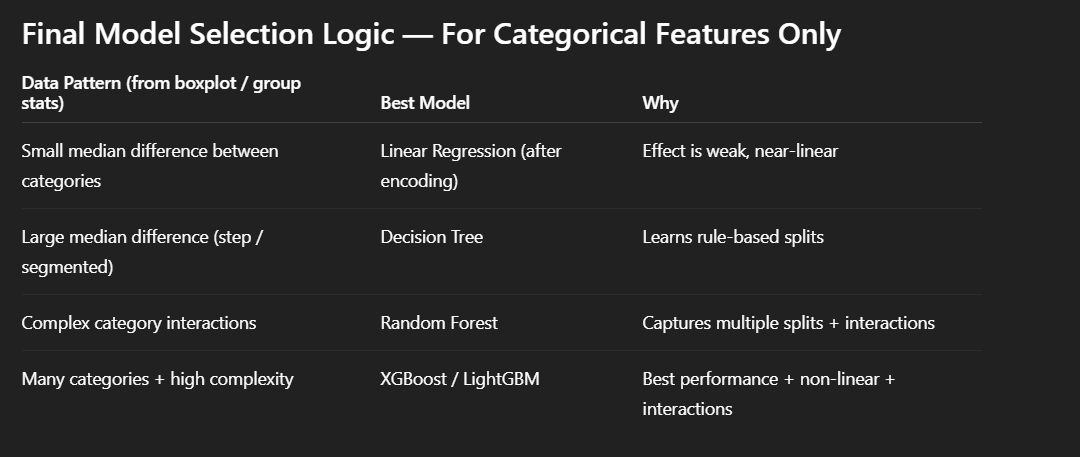

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in cat_cols:
    model = ols(f'Price_INR ~ C({col})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA for {col}")
    print(anova_table)



ANOVA for Unit_Type
                    sum_sq      df         F    PR(>F)
C(Unit_Type)  8.695467e+10     1.0  23.76426  0.000001
Residual      9.729421e+12  2659.0       NaN       NaN

ANOVA for Property_Category
                            sum_sq      df         F        PR(>F)
C(Property_Category)  3.102847e+11     4.0  21.67337  1.284368e-17
Residual              9.506091e+12  2656.0       NaN           NaN

ANOVA for Locality
                   sum_sq      df          F         PR(>F)
C(Locality)  2.784772e+12    55.0  18.757732  1.373937e-148
Residual     7.031603e+12  2605.0        NaN            NaN

ANOVA for Furnishing_Status
                            sum_sq      df          F        PR(>F)
C(Furnishing_Status)  3.590417e+11     2.0  50.454645  3.115522e-22
Residual              9.457334e+12  2658.0        NaN           NaN

ANOVA for Has_Pool
                   sum_sq      df           F        PR(>F)
C(Has_Pool)  6.257600e+11     1.0  181.042919  5.656106e-40
Residual   

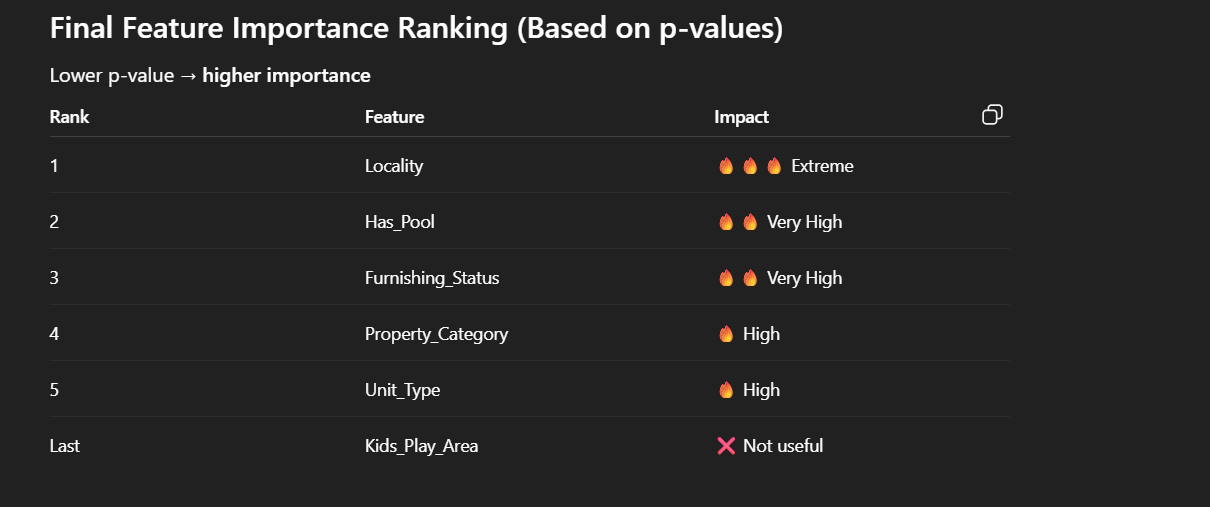

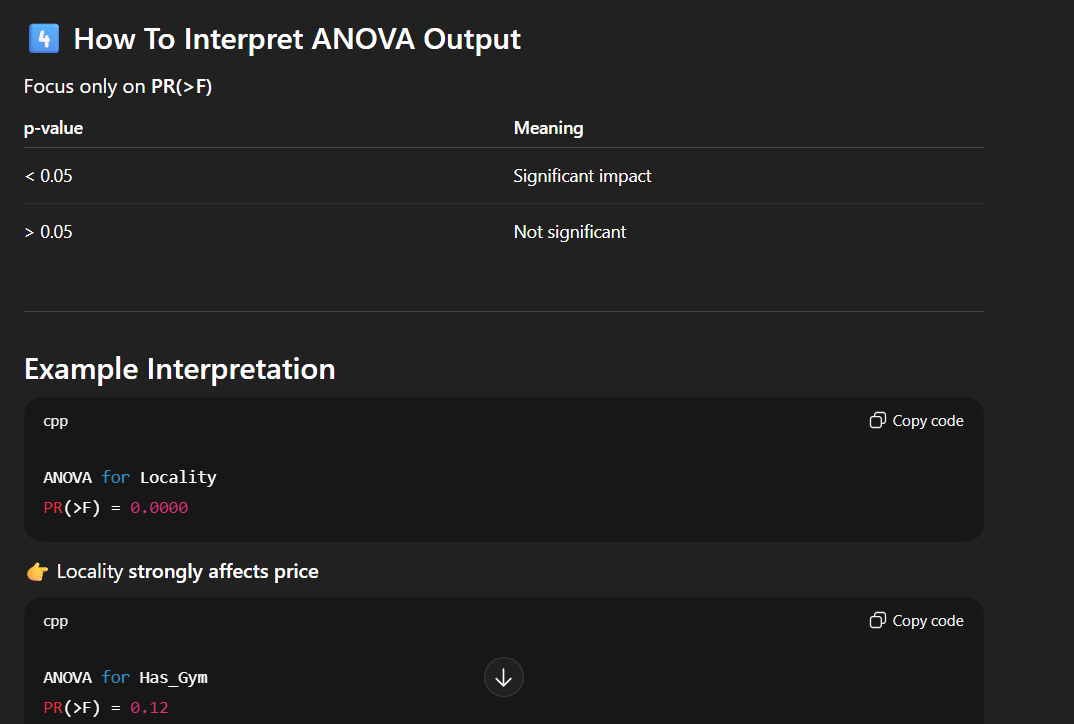

- Gym not very significant

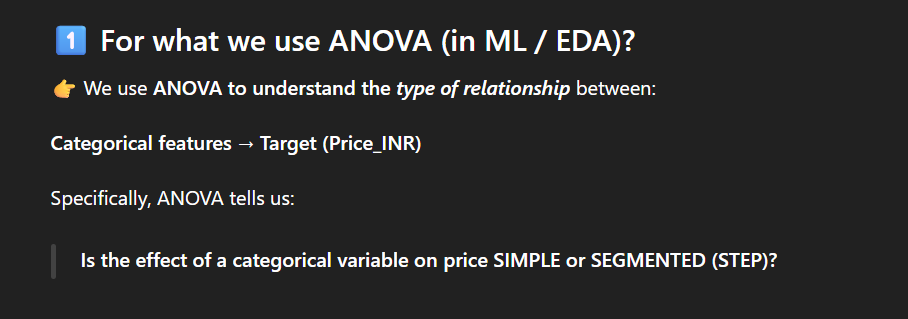

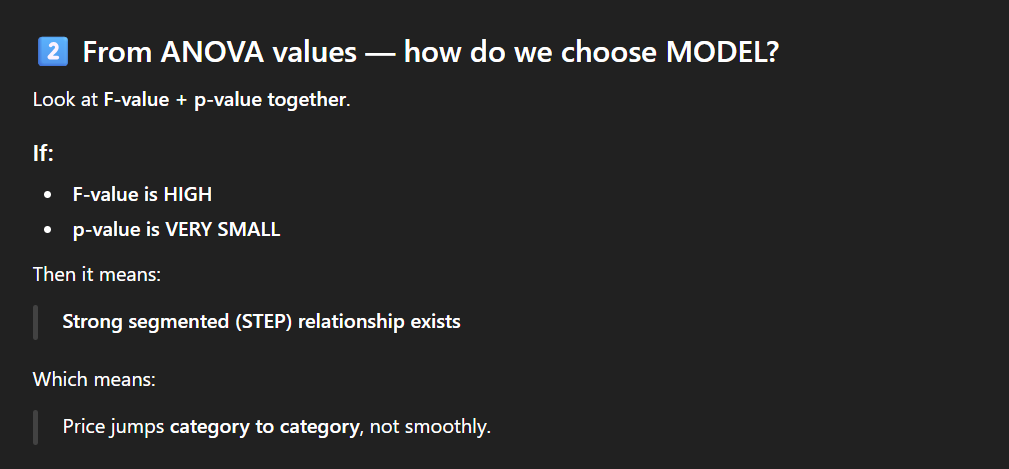

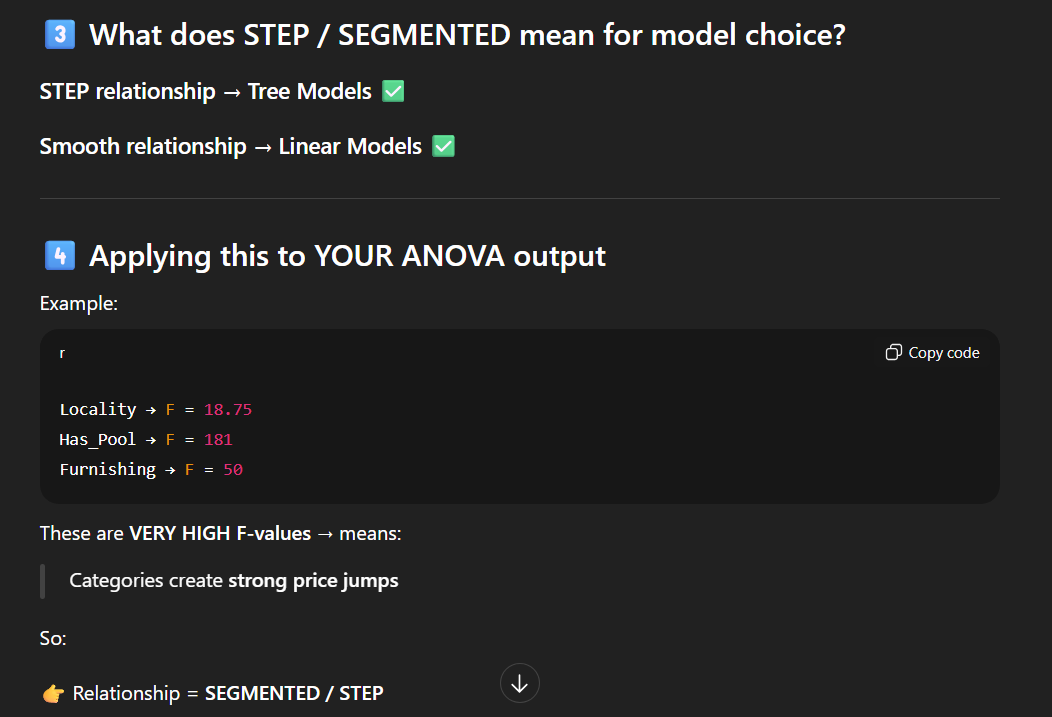

In [48]:
df.columns

Index(['No_of_Rooms', 'Unit_Type', 'Property_Category', 'Locality',
       'Price_INR', 'Area_sqft', 'Furnishing_Status', 'Has_Pool', 'Has_Gym',
       'Has_Parking', 'Has_Lift', 'Close_to_Hospital', 'Power_Backup',
       'Kids_Play_Area', 'Price_per_sqft'],
      dtype='object')

In [49]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [50]:
X = df.drop('Price_INR', axis=1)
y = df['Price_INR']


In [51]:
cat_cols = [
    'Unit_Type', 'Property_Category', 'Locality', 'Furnishing_Status',
    'Has_Pool', 'Has_Gym', 'Has_Parking', 'Has_Lift',
    'Close_to_Hospital', 'Power_Backup', 'Kids_Play_Area'
]

num_cols = [
    'No_of_Rooms', 'Area_sqft', 'Price_per_sqft'
]


In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)


In [53]:
dt = DecisionTreeRegressor(
    random_state=42
)


In [54]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', dt)
])


In [55]:
param_grid = {
    'model__max_depth': [5, 8, 10, 12, 15],
    'model__min_samples_leaf': [5, 10, 20],
    'model__min_samples_split': [10, 20, 40]
}



grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Unit_Type',
                                                                          'Property_Category',
                                                                          'Locality',
                                                                          'Furnishing_Status',
                                                                          'Has_Pool',
                                                                          'Has_Gym',
                                                                          'Has_Parking',
                                                                          'Has_Lift',
                                                                          'Close_to_Hospital',
                                                                          'Power_Backup',
                                                                          'Kids_Play_Area']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['No_of_Rooms',
                                                                          'Area_sqft',
                                                                          'Price_per_sqft'])])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 8, 10, 12, 15],
                         'model__min_samples_leaf': [5, 10, 20],
                         'model__min_samples_split': [10, 20, 40]},
             scoring='r2')

In [56]:
best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)


Best Params: {'model__max_depth': 15, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10}


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


Best Params: {'model__max_depth': 15, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10}
MAE: 3403.6982392268974
RMSE: 11186.586962104875
R2: 0.9538518749986195


In [58]:
train_pred = best_model.predict(X_train)
test_pred  = best_model.predict(X_test)

print("Train R2:", r2_score(y_train, train_pred))
print("Test R2 :", r2_score(y_test, test_pred))


Train R2: 0.9268770026261772
Test R2 : 0.9538518749986195


In [59]:
import joblib

joblib.dump(best_model, "rental_price_pipeline.pkl")


['rental_price_pipeline.pkl']